In [1]:
import numpy as np
import sys 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.linalg
import matplotlib
from matplotlib import cm
import sympy
from sympy import *
import random
import numpy.polynomial.polynomial as poly
import matplotlib.ticker as tkr

In [2]:
steps=19
vib1_mat=np.zeros((steps,steps))
vib2_mat=np.zeros((steps,steps))
tdm_x_mat=np.zeros((steps,steps))
tdm_y_mat=np.zeros((steps,steps))
tdm_z_mat=np.zeros((steps,steps))
i_list=[]
j_list=[]
k_list=[]
l_list=[]

file1=open('vib1_data.txt', 'r')
line = file1.readline()
i_list = line.split()
for i in range(len(i_list)):
    i_list[i]=float(i_list[i])
    k=int(i_list[i])-9
    k_list.append(k)
    
    
file2=open('vib2_data.txt', 'r') 
line = file2.readline()
j_list = line.split()
for i in range(len(j_list)):
    j_list[i]=float(j_list[i])
    l=int(j_list[i])-9
    l_list.append(l)
for i in range(len(i_list)):   
   
    vib1_mat[int(i_list[i]),int(j_list[i])]=k_list[i]
    vib2_mat[int(i_list[i]),int(j_list[i])]=l_list[i]

file3=open('tdm_x_data.txt', 'r') 
line = file3.readline()
tdm_x_list = line.split()
for i in range(len(tdm_x_list)):
    tdm_x_list[i]=float(tdm_x_list[i])/1.889725989
for i in range(len(i_list)):
    tdm_x_mat[int(i_list[i]),int(j_list[i])]=tdm_x_list[i]
    
file4=open('tdm_y_data.txt', 'r') 
line = file4.readline()
tdm_y_list = line.split()
for i in range(len(tdm_y_list)):
    tdm_y_list[i]=float(tdm_y_list[i])/1.889725989
for i in range(len(i_list)):
    tdm_y_mat[int(i_list[i]),int(j_list[i])]=tdm_y_list[i]    

file5=open('tdm_z_data.txt', 'r') 
line = file5.readline()
tdm_z_list = line.split()
for i in range(len(tdm_z_list)):
    tdm_z_list[i]=float(tdm_z_list[i])/1.889725989
for i in range(len(i_list)):
    tdm_z_mat[int(i_list[i]),int(j_list[i])]=tdm_z_list[i] 


In [3]:
def extract_freq(file):
    """ 
    This function extract vibrational frequencies and vibrational coordinates from a log file. returns a list of vibrational
    frequencies, freq_list and a list of vibrational coordinate matrices, mat_list
    """
    freq_list=[]
    red_list= []
    
    c=2.998*10**(10)
    amu_kg= 1.66053904*10**-27
   
    with open(file, 'r') as file:
        line = file.readline()
        while line:

            if 'Frequencies' in line :
                freq1=0
                freq2=0
                freq3=0
                red1 = 0
                red2 = 0
                red3 = 0
                
                data = line.split()
                freq1 = np.float(data[2])
                freq_list.append(freq1)
                freq2 = np.float(data[3])
                freq_list.append(freq2)
                freq3 = np.float(data[4])
                freq_list.append(freq3)
                line= file.readline()
                
                data2 = line.split()
                red1 = np.float(data2[3])
                red_list.append(red1)
                red2 = np.float(data2[4])
                red_list.append(red2)
                red3 = np.float(data2[5])
                red_list.append(red3)
            line = file.readline()
            
    freq_list=np.array(freq_list)
    freq_list*=c
    red_list=np.array(red_list)
    red_list*=amu_kg
    
    
            
    return freq_list, red_list

In [4]:
def firstderiv(v):
    
    if v==1:
        x1=np.array(tdm_x_mat[:,9])
        y1=np.array(tdm_y_mat[:,9])
        z1=np.array(tdm_z_mat[:,9])
        y=[-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9]
    
    elif v==2:
        x1=np.array(tdm_x_mat[9,:])
        y1=np.array(tdm_y_mat[9,:])
        z1=np.array(tdm_z_mat[9,:])
        y=[-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9]
    z2=np.array(tdm_z_mat[0,:])
    
    X = sympy.Symbol('X')
    dif_liste=[]
    matplotlib.rcParams.update({'font.size': 14.8})
    
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
   
    r=[x1,y1,z1]
    c=['#eb3986','#FFA500','#8B008B']
    l=['x','y','z']
    for i in range(3):

        coefs = poly.polyfit(y, r[i], 4)
        ffit = poly.polyval(y, coefs)
        """
        plt.plot(y, ffit,color=c[i],label=l[i])
        plt.xlabel(r'Q$_{v1} $[10$^{-3}$'+'Å]')
        plt.ylabel('\u03BC [Å]')
        plt.legend()
        plt.plot(y, r[i], 'o', color=c[i])
        """
        Z=coefs[0]+coefs[1]*X+coefs[2]*X**2+coefs[3]*X**3+coefs[4]*X**4#+coefs[5]*X**5 #+coefs[6]*X**6
        function_dx=Z.diff(X)
        diff=function_dx.subs([(X,0)])
        dif_liste.append(diff)
        
        #print('dif'+str(l[i])+'='+str(dif_liste[i]))

    mu=sqrt((dif_liste[0])**2+(dif_liste[1])**2+(dif_liste[2])**2)
   

    return mu

In [5]:
def osc_first(m1,m2,nu1,nu2,ex_freq, stepsize,v):
    h=6.62608*10**(-34)
    me=9.10938*10**(-31) 
    a0_m=5.292*10**(-11)
    
    conversion=stepsize
    
    if v==1:
        Q_squared= h/(m1*8*np.pi**2*nu1)
    elif v==2:
        Q_squared= h/(m2*8*np.pi**2*nu2)
    
    f= ((8*np.pi**2*me)/(3*h))*ex_freq*((firstderiv(v))*conversion**(-1))**2*Q_squared

    return f

In [6]:
def e_freq(file):
    """
    This function calculates the oscillator strength from the length of the transition dipole moment, mu, and the absorption 
    frequency taken from a log file.
    """
    h=6.62608*10**(-34)
    me=9.10938*10**(-31)
    c=2.998*10**(17)
    wl=0
    with open(file, 'r') as file:
        line = file.readline()
        while line:
            if 'Excited State   1' in line :
                data = line.split()
                wl = np.float(data[6])
            line = file.readline()
    
    ex_freq=c/wl
    
    return ex_freq

In [ ]:
def get_ints():
    cwd=os.getcwd()
    name=cwd.split('\\')
    subdir=name[len(name)-1]
    ints=subdir.split('_')
    ints=ints[0].split('v')

    int1=ints[1]
    int2=ints[2]
    return int1,int2

difx=2.97844519954064e-12
dify=1.06939162195738e-11
difz=1.77446437443075e-5
5.86575991758257e-7


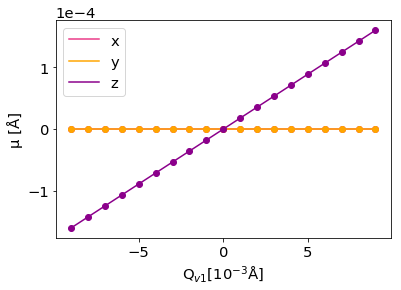

In [8]:
file='LiNO3_pople_water.log'     # a log-file containing the ground-state vibrational frequencies
file2= 'td.log'                  # a log-file containing a TD-DFT calculation in the ground vibrational state

freq_list, red_list= extract_freq(file)
ex_freq=e_freq(file2)
stepsize=0.001
int1, int2=get_ints()
vib1=int(int2)
vib2=int(int1)
v=1

oscillator_1=osc_first(red_list[vib1-1], red_list[vib2-1],freq_list[vib1-1], freq_list[vib2-1],ex_freq,stepsize,v)
#plt.savefig('plot'+str(vib1)+'.pdf',dpi=230,bbox_inches='tight')
print(str(int2)+'='+str(oscillator_1))